# SQL in Python - Connecting to and retrieving data from PostgreSQL

Previously, you have learned how to connect to a SQL database by using a SQL client such as DBeaver. Apart from connecting to databases, DBeaver also allows you to run SQL queries against the database, create new tables and populate them with data as well as retrieving the data.

Python also allows executing SQL queries and getting the result into a Python object, for example a Pandas data frame. Instead of exporting a .csv file from DBeaver you can directly get the data you need into Python and continue your work. In addition we can reduce the steps by connecting to the database from Python directly, eliminating the need for a separate SQL client.

After you have the data in Python in the required shape you can export the data into a .csv file. This file is for your own reference, please avoid sending .csv files around - database is the point of reference when it comes to data. 

Having a copy of a .csv file (or another format) can speed up your analysis work. Imagine that the query takes 25 minutes to run. If you made some mistakes in your Python code you might need to go back to the original dataset. Instead of having to rerun the SQL query and having to wait you can read in the .csv file you have previously saved on your hard disk into Python and continue with your analysis work. 

**In this notebook you will see 2 ways to connect to SQL-Databases and export the data to a CSV file**


## Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [1]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [3]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [4]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [5]:
cur.execute('SELECT * FROM eda.king_county_house_sales LIMIT 10')
cur.fetchall()

[(datetime.date(2014, 10, 13), 221900.0, 7129300520, 1),
 (datetime.date(2014, 12, 9), 538000.0, 6414100192, 2),
 (datetime.date(2015, 2, 25), 180000.0, 5631500400, 3),
 (datetime.date(2014, 12, 9), 604000.0, 2487200875, 4),
 (datetime.date(2015, 2, 18), 510000.0, 1954400510, 5),
 (datetime.date(2014, 5, 12), 1230000.0, 7237550310, 6),
 (datetime.date(2014, 6, 27), 257500.0, 1321400060, 7),
 (datetime.date(2015, 1, 15), 291850.0, 2008000270, 8),
 (datetime.date(2015, 4, 15), 229500.0, 2414600126, 9),
 (datetime.date(2015, 3, 12), 323000.0, 3793500160, 10)]

With `conn.close()` you can close the connection again.

In [5]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [6]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [7]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales LIMIT 10"
df_psycopg = pd.read_sql(query_string, conn)

/var/folders/yq/ygxpmd3j5pq7tmf46p9cp4dm0000gn/T/ipykernel_93533/1176423828.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_psycopg = pd.read_sql(query_string, conn)


In [8]:
#close the connection
conn.close()

In [9]:
df_psycopg.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [17]:
#export the data to a csv-file
df_psycopg.to_csv('data/eda.csv',index=False)

### Connecting and retrieving data via SQLAlchemy

`sqlalchemy` works similarly. Here you have to create an engine with the database sting (a link that includes every information we entered in the conn object)

In [4]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

And then you can import that engine with a query into a pandas dataframe.

In [5]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sqlalchemy1 = pd.read_sql(query_string, db)

In [5]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
df_sqlalchemy2 = pd.read_sql(query_string, db)

In [16]:
#import the data to a pandas dataframe
query_string = 'select kchd.*,kchs."date" ,kchs.price from eda.king_county_house_details kchd left join eda.king_county_house_sales kchs on kchd.id = kchs.house_id'
df_sqlalchemy3 = pd.read_sql(query_string, db)

In [6]:
df_sqlalchemy1.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [6]:
df_sqlalchemy2.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0


In [17]:
df_sqlalchemy3.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


Because we don't want to run the queries over and over again we can export the data into a .csv file in order to use it in other notebooks as well. 

In [7]:
#export the data to a csv-file
df_sqlalchemy1.to_csv('king_county_house_sales.csv',index=False)

In [7]:
#export the data to a csv-file
df_sqlalchemy2.to_csv('king_county_house_details.csv',index=False)

In [18]:
#export the data to a csv-file
df_sqlalchemy3.to_csv('king_county_house_total.csv',index=False)

In [1]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Import the data as pandas dataframe (from a csv-file)
df_sales = pd.read_csv('data/king_county_house_sales.csv')
df_details = pd.read_csv('data/king_county_house_details.csv')
df_data = pd.read_csv('data/king_county_house_total.csv')

In [ ]:
df_sales.info()
df_sales.head(5)

In [ ]:
df_details.info()
df_details.head(5)

In [74]:
df_data.info()
df_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [ ]:
# Check for missing data in dataframe
df_nan_count = df_data.isna().sum().sort_values(ascending=False)
df_nan_ratio = df_data.isna().mean().sort_values(ascending=False)*100

print(df_nan_count)
print(df_nan_ratio)

In [ ]:
# Plot: color
#color = sns.color_palette("husl",3)
#sns.set_palette(color)

# Plot average house price per zipcode
p = sns.barplot(x="zipcode", y="price", errorbar="ci", data=df_data)
p.set_title("House price per zipcode")
p.set_xlabel("Zipcode")
p.set_ylabel("Price ($)")
plt.show()

#color = sns.color_palette("husl",5)
#sns.set_palette(color)

# Plot house price per condition
#p = sns.boxplot(x="condition", y="price", data=df_data)
#p.set_title("House price per condition")
#p.set_xlabel("Condition")
#p.set_ylabel("Price ($)")
#plt.show()

color = sns.color_palette("husl",11)
sns.set_palette(color)

# Plot house price per grade
p = sns.boxplot(x="grade", y="price", data=df_data)
p.set_title("House price per grade")
p.set_xlabel("Grade")
p.set_ylabel("Price ($)")
plt.show()

color = sns.color_palette("husl",5)
sns.set_palette(color)

# Plot house price per grade and condition
p = sns.boxplot(x="grade", y="price", hue="condition", data=df_data)
p.set_title("House price per grade")
p.set_xlabel("Grade")
p.set_ylabel("Price ($)")
plt.show()

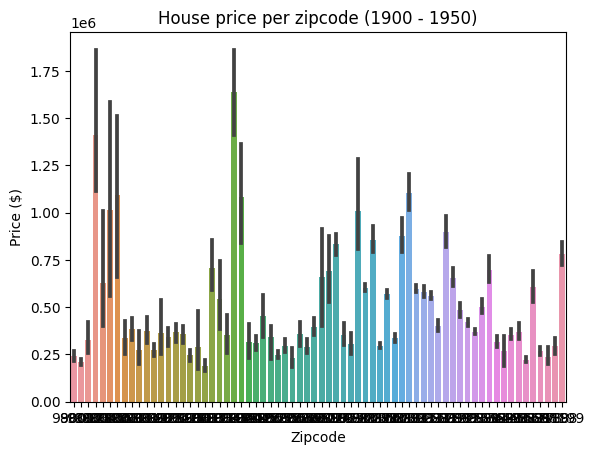

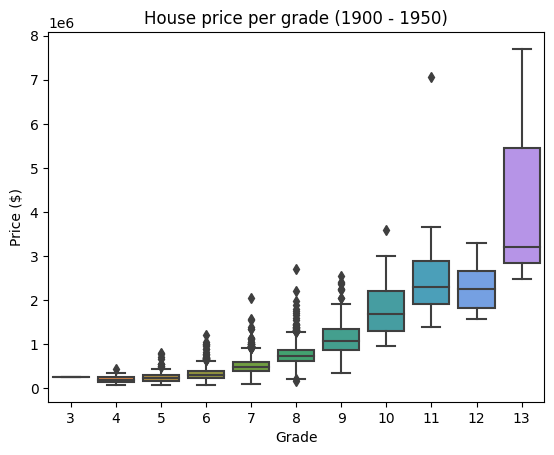

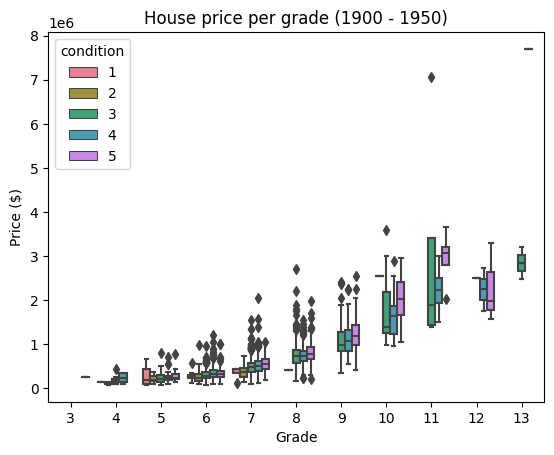

In [82]:
# Define historic buildings by age
building_age = 1950

# Extract data for historic buildings
df = df_data[df_data["yr_built"] <= building_age]
building_age_max = df["yr_built"].max()
building_age_min = df["yr_built"].min()

# Plot: Average house price per zipcode ( 1900 - 1950)
p = sns.barplot(x="zipcode", y="price", errorbar="ci", data=df)
p.set_title(f"House price per zipcode ({building_age_min} - {building_age_max})")
p.set_xlabel("Zipcode")
p.set_ylabel("Price ($)")
plt.show()

color = sns.color_palette("husl",13)
sns.set_palette(color)

# Plot house price per grade
p = sns.boxplot(x="grade", y="price", data=df)
p.set_title(f"House price per grade ({building_age_min} - {building_age_max})")
p.set_xlabel("Grade")
p.set_ylabel("Price ($)")
plt.show()

color = sns.color_palette("husl",5)
sns.set_palette(color)

# Plot house price per grade and condition
p = sns.boxplot(x="grade", y="price", hue="condition", data=df)
p.set_title(f"House price per grade ({building_age_min} - {building_age_max})")
p.set_xlabel("Grade")
p.set_ylabel("Price ($)")
plt.show()

In [ ]:
# Plot: House count per zipcode ( 1900 - 1950)
p = sns.countplot(y="zipcode", data=df)
p.set_title(f"House count per zipcode ({building_age_min} - {building_age_max})")
p.set_xlabel("Count")
p.set_ylabel("Zipcode")
plt.show()

# Plot: House count per zipcode ( 1900 - 1950)
p = sns.scatterplot(x="lat", y="long", hue="grade" , data=df)
p.set_title(f"Houses ({building_age_min} - {building_age_max})")
p.set_xlabel("Latidude (°)")
p.set_ylabel("Longitude (°)")
plt.show()

In [73]:
# Count historic buildings per zipcode
building_count = df.groupby("zipcode").count().sort_values("id", ascending=False)
building_count = building_count.reset_index()

# Extract zipcodes with highest count of historic buildings
building_count_zip = building_count.zipcode[building_count["id"] > 50]
print(building_count_zip)

0     98115
1     98117
2     98103
3     98118
4     98126
5     98116
6     98105
7     98144
8     98199
9     98112
10    98125
11    98122
12    98133
13    98155
14    98106
15    98168
16    98146
17    98107
18    98136
19    98119
20    98178
21    98108
22    98166
23    98109
24    98177
25    98055
26    98102
27    98022
Name: zipcode, dtype: int64
